In [1]:
import pandas as pd
np=pd.np
from sdd_api.api import Api
from credentials import *
import matplotlib.pyplot as plt
%matplotlib inline
api = Api(username=username, password=password, client_id=client_id, client_secret=client_secret)

To get the data, enter in the table name from our metadata sheet. 

In [2]:
dfs=api.get_dataframe('dfs_salaries')
dfs.sample(4)

,season,week_num,player_name,team_name,position,opp_name,fd_points,fd_salary,dk_points,dk_salary,yh_points,yh_salary,player_id
5675,2016,14,Matthew Mulligan,DET,TE,CHI,0.0,4500.0,0.0,2500.0,0.0,10.0,15936
8153,2017,2,Anthony Fasano,MIA,TE,LAC,NaN,4500.0,NaN,2500.0,NaN,NaN,6691
1433,2016,4,Jeremy Kerley,SF,WR,DAL,17.8,5200.0,20.8,3400.0,17.8,11.0,12091
4879,2016,12,Adam Thielen,MIN,WR,DET,9.3,6200.0,13.3,4000.0,9.3,13.0,21893


In [3]:
dfs.describe()

,season,week_num,fd_points,fd_salary,dk_points,dk_salary,yh_points,yh_salary
count,8209.000000,8209.000000,7829.000000,8100.000000,7231.000000,7517.000000,7226.000000,7163.000000
mean,2016.099647,8.326593,6.417606,5322.333333,7.422976,3931.222562,6.353728,15.373866
std,0.299547,5.254644,7.001161,1150.846942,8.175177,1492.979048,7.157874,7.404863
min,2016.000000,1.000000,-4.000000,3000.000000,-4.000000,2000.000000,-4.000000,10.000000
25%,2016.000000,3.000000,0.600000,4500.000000,0.300000,3000.000000,0.210000,10.000000
50%,2016.000000,8.000000,4.200000,4700.000000,4.900000,3200.000000,3.900000,11.000000
75%,2016.000000,13.000000,10.000000,5900.000000,11.780000,4900.000000,10.030000,19.000000
max,2017.000000,17.000000,49.800000,9700.000000,54.800000,10000.000000,49.800000,42.000000


In [4]:
dfs.groupby(["position"]).agg([max])

,season,week_num,player_name,team_name,opp_name,fd_points,fd_salary,dk_points,dk_salary,yh_points,yh_salary,player_id
,max,max,max,max,max,max,max,max,max,max,max,max
position,,,,,,,,,,,,
DST,2017,17,Washington Redskins,WAS,WAS,35.00,5400.0,35.00,4100.0,35.00,22.0,
K,2017,17,Zane Gonzalez,WAS,WAS,23.00,5300.0,NaN,NaN,NaN,NaN,9338
QB,2017,17,Tyrod Taylor,WAS,WAS,37.18,9300.0,40.18,8500.0,37.18,42.0,9979
RB,2017,17,Zach Zenner,WAS,WAS,49.80,9500.0,54.80,9800.0,49.80,42.0,9873
TE,2017,17,Zach Miller,WAS,WAS,32.40,8500.0,41.90,7200.0,32.40,30.0,9824
WR,2017,17,Zay Jones,WAS,WAS,42.00,9700.0,51.00,10000.0,42.00,41.0,9977


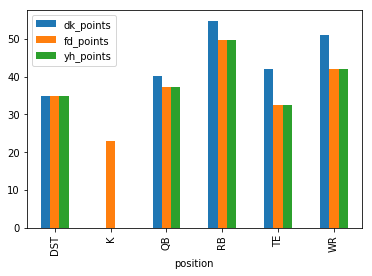

In [5]:
dfs.groupby("position")[['position','dk_points','fd_points','yh_points']].agg(max).plot(kind="bar")

Defaultly, we give you results from 2016-present. To get more data, include a season_start parameter

In [6]:
dfs2014_present=api.get_dataframe('dfs_salaries',season_start=2014)
dfs2014_present.sample(10)

,season,week_num,player_name,team_name,position,opp_name,fd_points,fd_salary,dk_points,dk_salary,yh_points,yh_salary,player_id
8197,2015,2,Steve Smith,BAL,WR,OAK,20.0,6700.0,28.0,6000.0,NaN,NaN,20689
9408,2015,5,Nick Novak,HOU,K,IND,9.0,4600.0,NaN,NaN,NaN,NaN,16486
1413,2014,4,Buffalo Defense,BUF,DST,HOU,9.0,5100.0,9.0,2800.0,NaN,NaN,
21207,2016,16,Marc Mariani,TEN,WR,JAC,0.0,4500.0,0.0,3000.0,0.0,10.0,13979
2942,2014,7,Wes Welker,DEN,WR,SF,12.5,6400.0,14.0,3700.0,NaN,NaN,23473
10730,2015,8,Travis Coons,CLE,K,ARI,2.0,4500.0,NaN,NaN,NaN,NaN,4473
1785,2014,4,Roy Helu,WAS,RB,NYG,11.1,5100.0,13.6,3400.0,NaN,NaN,9544
1190,2014,3,Ahmad Bradshaw,IND,RB,JAC,15.3,5200.0,16.3,4800.0,NaN,NaN,2210
20600,2016,14,Stephen Gostkowski,NE,K,BAL,4.0,4800.0,NaN,NaN,NaN,NaN,8140
7913,2015,1,Jerome Felton,BUF,RB,IND,0.0,4500.0,0.0,3000.0,NaN,NaN,6769


That's it for this guide! Check out some of our other examples like our daily fantasy lineup optimizer or our power rankings example.